**Note:** this notebook uses model created with `conv2d-classification.ipynb`

In [8]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")
print(f"GPU devices: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.10.1
Keras version: 2.10.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
import os
if os.path.exists('config/localconfig.py'):
    from config import localconfig as config
else:
    from config import config

In [10]:
classes = ['unknown_cone', 'yellow_cone', 'blue_cone', 'orange_cone', 'large_orange_cone']
model: tf.keras.Model = tf.keras.models.load_model(os.path.join('models', 'conv2d_loss_0.27_acc_0.97.h5'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [11]:
image_paths = os.listdir(config.BB_IMAGES)

I = tf.keras.utils.load_img(os.path.join(config.BB_IMAGES, image_paths[0]))
I = tf.keras.utils.img_to_array(I)

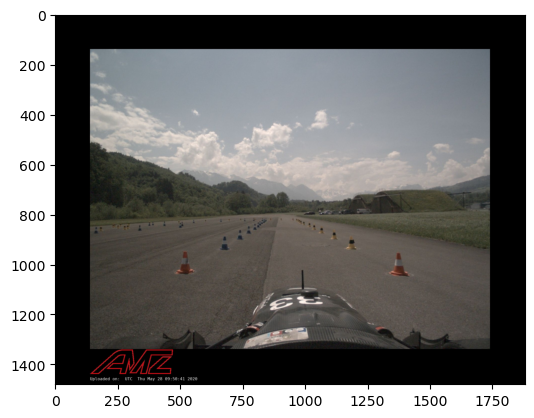

In [12]:
import matplotlib.pyplot as plt

plt.imshow(I.astype('uint8'))
plt.show()

In [13]:
import numpy as np

Y, X, _ = I.shape
print(Y, X)
w = 100

1480 1880


Line: 0
Line: 50
Line: 100
Line: 150
Line: 200
Line: 250
Line: 300
Line: 350
Line: 400
Line: 450
Line: 500
Line: 550
Line: 600
Line: 650
Line: 700
Line: 750
Line: 800
Line: 850
Line: 900
Line: 950
Line: 1000
Line: 1050
Line: 1100
Line: 1150
Line: 1200
Line: 1250
Line: 1300
Line: 1350


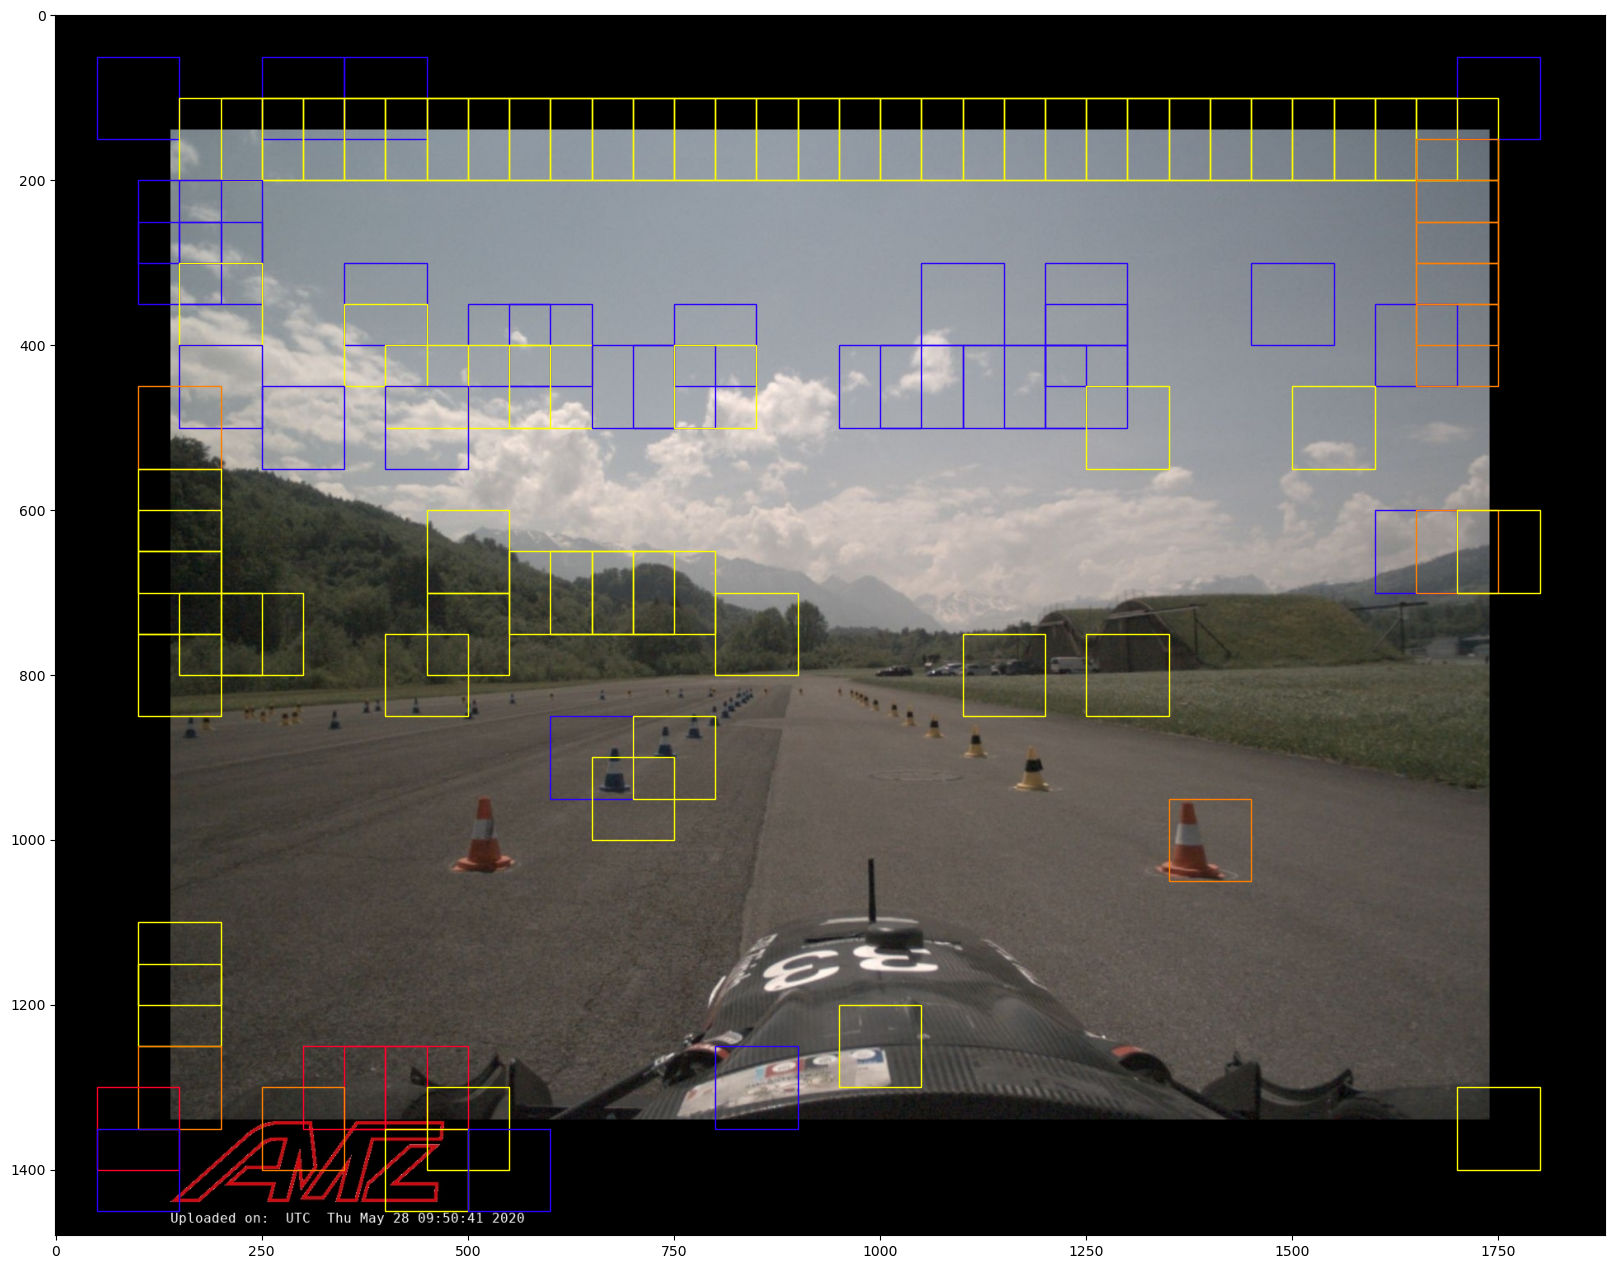

In [14]:
from tools import get_class
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(I.astype('uint8'))

for y in range(0, Y - w, int(w/2)):
    print("Line:", y)
    for x in range(0, X - w, int(w/2)):
        cropped = tf.image.crop_to_bounding_box(I, y, x, w, w)
        cropped = tf.keras.utils.array_to_img(cropped)
        cropped = cropped.resize((224, 224))
        cropped = tf.keras.utils.img_to_array(cropped)
        pred = model(cropped[None, :])
        if np.any(pred < -5) and np.all(pred <= 0):
            continue
        pred_class = np.argmax(pred, axis=-1)
        loss, acc = model.evaluate(cropped[None, :], pred_class, verbose=0)
        if loss < 10e-08 or loss > 0.004 or classes[pred_class[0]] == 'unknown_cone':
            continue
        ax.add_patch(Rectangle((x, y), w, w, linewidth=1, edgecolor=get_class(classes[pred_class[0]])['color'], facecolor='none'))
plt.show()